In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
#from scikitplot.metrics import plot_roc
from sklearn.preprocessing import LabelEncoder

from collections import defaultdict
from collections import Counter


In [ ]:
from google.colab import files
from scikitplot.metrics import plot_roc


In [ ]:
!pip install scikit-plot

In [ ]:
uploaded = files.upload()
#importo il train e test encoded (sto importando quelli GIÀ ONE HOT ENCODED)
df_train = pd.read_csv('df_train_mod2.csv')
df_test = pd.read_csv('df_test_mod2.csv')

Saving df_test_mod2.csv to df_test_mod2.csv
Saving df_train_mod2.csv to df_train_mod2.csv


In [ ]:
df_train = pd.read_csv('df_train_mod2.csv')
df_test = pd.read_csv('df_test_mod2.csv')

In [ ]:
#Prendo la variabile target, in questo caso emotion:
y_train = df_train['emotion']
y_test = df_test['emotion']

In [ ]:
#tolgo emotion visto che l'ho salvata nella y - IMPORTANTE!
df_train.drop(columns=['emotion'],inplace=True)
df_test.drop(columns=['emotion'],inplace=True)

In [ ]:
#Faccio la normalizzazione con StandardScaler -
#le cose che ci sono scritte prima sono perchè si fa la normalizzazione solo sulle colonne numeriche, non su quelle categoriche encoded
#(specialmente visto che sono anche binarie), e queste categoriche sono le ultime 5 colonne dei dataframe

columns_to_scale_train = df_train.iloc[:, :-5]
columns_to_scale_test = df_test.iloc[:, :-5]


# Extract the columns to be kept as they are
columns_to_keep_train = df_train.iloc[:, -5:]
columns_to_keep_test = df_test.iloc[:, -5:]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the columns to be scaled
scaler.fit(columns_to_scale_train) #faccio il fit solo sulle colonne del train!
train_scaled = scaler.transform(columns_to_scale_train)
test_scaled = scaler.transform(columns_to_scale_test)


# Concatenate the scaled columns and the columns to be kept
df_train = pd.concat([pd.DataFrame(train_scaled, columns=columns_to_scale_train.columns), columns_to_keep_train], axis=1)
df_test = pd.concat([pd.DataFrame(test_scaled, columns=columns_to_scale_test.columns), columns_to_keep_test], axis=1)

In [ ]:
# Salvo in x_train e x_test i valori
x_train = df_train.values
x_test = df_test.values

**Rete Neurale "base"**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# NN base, con tutti i parametri settati a quelli di default
clf = MLPClassifier(random_state=42)

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5
F1-score [0.65470852 0.5492228  0.54545455 0.45637584 0.47619048 0.45098039
 0.34730539 0.42553191]
              precision    recall  f1-score   support

           0       0.57      0.76      0.65        96
           1       0.55      0.55      0.55        96
           2       0.48      0.62      0.55        48
           3       0.64      0.35      0.46        96
           4       0.44      0.52      0.48        96
           5       0.43      0.48      0.45        48
           6       0.41      0.30      0.35        96
           7       0.43      0.42      0.43        48

    accuracy                           0.50       624
   macro avg       0.49      0.50      0.49       624
weighted avg       0.50      0.50      0.49       624



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


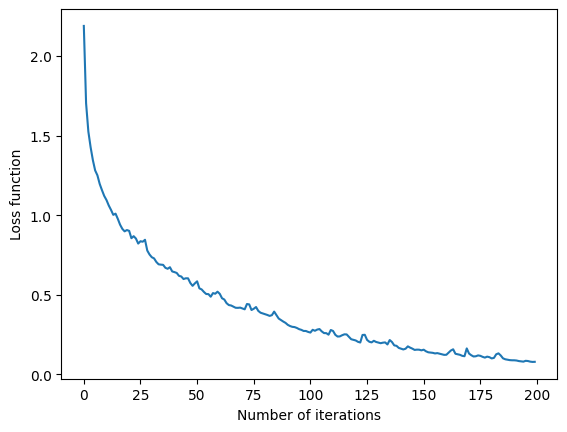

In [ ]:
#grafico della loss function
plt.plot(clf.loss_curve_)
plt.xlabel('Number of iterations')
plt.ylabel('Loss function')
plt.show()

In [ ]:
clf1 = MLPClassifier(learning_rate='constant',momentum=0,random_state=42)
clf2 = MLPClassifier(learning_rate='invscaling',momentum=0,random_state=42)
clf3 = MLPClassifier(learning_rate='adaptive',momentum=0,random_state=42)
clf4 = MLPClassifier(learning_rate='constant',random_state=42)
clf5 = MLPClassifier(learning_rate='invscaling',random_state=42)
clf6 = MLPClassifier(learning_rate='adaptive',random_state=42)


clf1.fit(x_train, y_train)
clf2.fit(x_train, y_train)
clf3.fit(x_train, y_train)
clf4.fit(x_train, y_train)
clf5.fit(x_train, y_train)
clf6.fit(x_train, y_train)

y_pred1 = clf1.predict(x_test)
y_pred2 = clf2.predict(x_test)
y_pred3 = clf3.predict(x_test)
y_pred4 = clf4.predict(x_test)
y_pred5 = clf5.predict(x_test)
y_pred6 = clf6.predict(x_test)

print('Accuracy 1 %s' % accuracy_score(y_test, y_pred1))
print('Accuracy 2 %s' % accuracy_score(y_test, y_pred2))
print('Accuracy 3 %s' % accuracy_score(y_test, y_pred3))
print('Accuracy 4 %s' % accuracy_score(y_test, y_pred4))
print('Accuracy 5 %s' % accuracy_score(y_test, y_pred5))
print('Accuracy 6 %s' % accuracy_score(y_test, y_pred6))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Accuracy 1 0.5
Accuracy 2 0.5
Accuracy 3 0.5
Accuracy 4 0.5
Accuracy 5 0.5
Accuracy 6 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


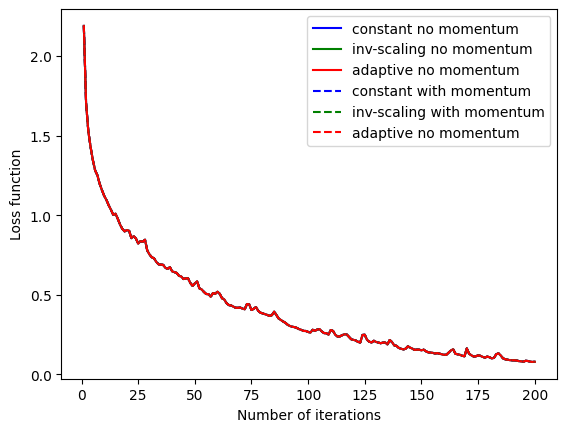

In [ ]:
x = range(1, len(clf1.loss_curve_) + 1)
y1 = clf1.loss_curve_
y2 = clf2.loss_curve_
y3 = clf3.loss_curve_
y4 = clf4.loss_curve_
y5 = clf5.loss_curve_
y6 = clf6.loss_curve_

# Plotting the data with labels and aesthetics
plt.plot(x, y1, label='constant no momentum', linestyle='-', color='blue')
plt.plot(x, y2, label='inv-scaling no momentum', linestyle='-', color='green')
plt.plot(x, y3, label='adaptive no momentum', linestyle='-', color='red')
plt.plot(x, y4, label='constant with momentum', linestyle='--', color='blue')
plt.plot(x, y5, label='inv-scaling with momentum', linestyle='--', color='green')
plt.plot(x, y6, label='adaptive no momentum', linestyle='--', color='red')

# Adding a legend
plt.legend()

# Adding titles to the axes
plt.xlabel('Number of iterations')
plt.ylabel('Loss function')

# Display the plot
plt.show()

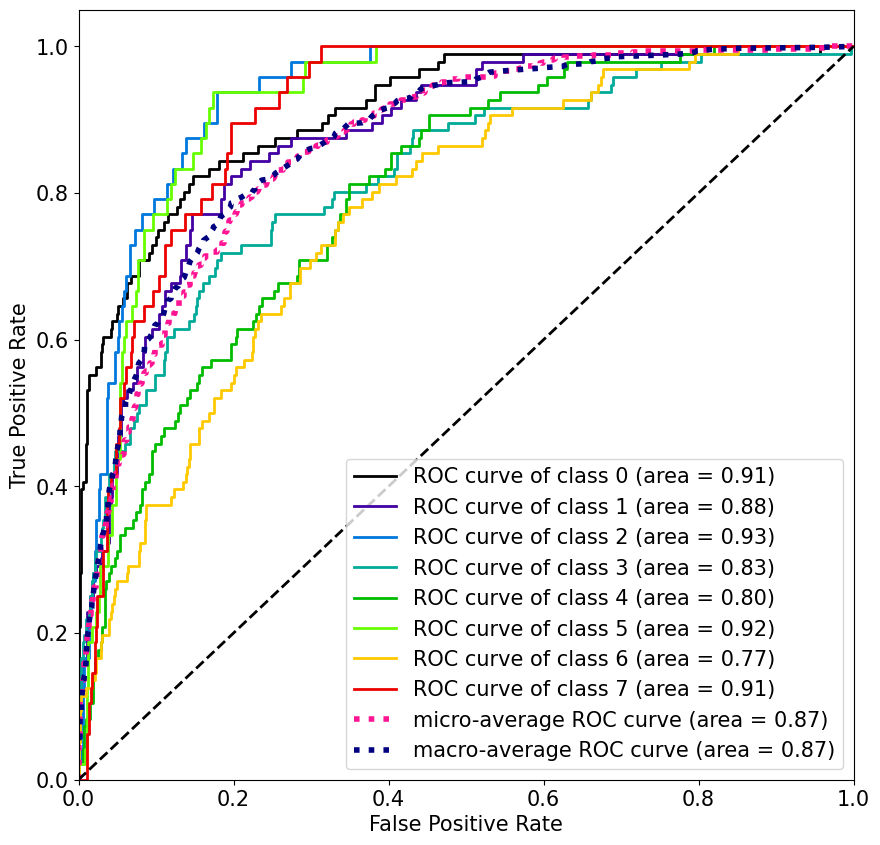

In [ ]:
#ROC del classificatore NN base
y_score_clf = clf.predict_proba(x_test)
plot_roc(y_test, y_score_clf, figsize=(10,10), title_fontsize=15, text_fontsize=15)
plt.title("")
plt.show()

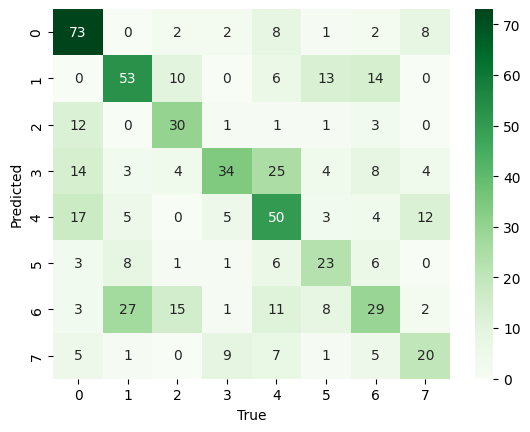

In [ ]:
#CONFUSION MATRIX

from sklearn.metrics import confusion_matrix
import seaborn as sns

# plot della CONFUSION MATRIX
cf1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cf1, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [ ]:
clf1 = MLPClassifier(hidden_layer_sizes=(16,),learning_rate='constant',momentum=0,random_state=42, max_iter=200, validation_fraction=0.2)
clf2 = MLPClassifier(hidden_layer_sizes=(16,),learning_rate='invscaling',momentum=0,random_state=42, max_iter=200, validation_fraction=0.2)
clf3 = MLPClassifier(hidden_layer_sizes=(16,),learning_rate='adaptive',momentum=0,random_state=42, max_iter=200, validation_fraction=0.2)
clf4 = MLPClassifier(hidden_layer_sizes=(16,),learning_rate='constant',random_state=42, max_iter=200, validation_fraction=0.2)
clf5 = MLPClassifier(hidden_layer_sizes=(16,),learning_rate='invscaling',random_state=42, max_iter=200, validation_fraction=0.2)
clf6 = MLPClassifier(hidden_layer_sizes=(16,),learning_rate='adaptive',random_state=42, max_iter=200, validation_fraction=0.2)


clf1.fit(x_train, y_train)
clf2.fit(x_train, y_train)
clf3.fit(x_train, y_train)
clf4.fit(x_train, y_train)
clf5.fit(x_train, y_train)
clf6.fit(x_train, y_train)

y_pred1 = clf1.predict(x_test)
y_pred2 = clf2.predict(x_test)
y_pred3 = clf3.predict(x_test)
y_pred4 = clf4.predict(x_test)
y_pred5 = clf5.predict(x_test)
y_pred6 = clf6.predict(x_test)

print('Accuracy 1 %s' % accuracy_score(y_test, y_pred1))
print('Accuracy 2 %s' % accuracy_score(y_test, y_pred2))
print('Accuracy 3 %s' % accuracy_score(y_test, y_pred3))
print('Accuracy 4 %s' % accuracy_score(y_test, y_pred4))
print('Accuracy 5 %s' % accuracy_score(y_test, y_pred5))
print('Accuracy 6 %s' % accuracy_score(y_test, y_pred6))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Accuracy 1 0.5160256410256411
Accuracy 2 0.5160256410256411
Accuracy 3 0.5160256410256411
Accuracy 4 0.5160256410256411
Accuracy 5 0.5160256410256411
Accuracy 6 0.5160256410256411


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


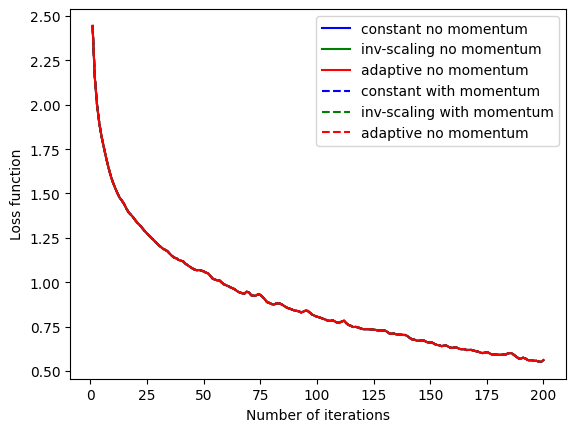

In [ ]:
x = range(1, len(clf1.loss_curve_) + 1)
y1 = clf1.loss_curve_
y2 = clf2.loss_curve_
y3 = clf3.loss_curve_
y4 = clf4.loss_curve_
y5 = clf5.loss_curve_
y6 = clf6.loss_curve_

# Plotting the data with labels and aesthetics
plt.plot(x, y1, label='constant no momentum', linestyle='-', color='blue')
plt.plot(x, y2, label='inv-scaling no momentum', linestyle='-', color='green')
plt.plot(x, y3, label='adaptive no momentum', linestyle='-', color='red')
plt.plot(x, y4, label='constant with momentum', linestyle='--', color='blue')
plt.plot(x, y5, label='inv-scaling with momentum', linestyle='--', color='green')
plt.plot(x, y6, label='adaptive no momentum', linestyle='--', color='red')

# Adding a legend
plt.legend()

# Adding titles to the axes
plt.xlabel('Number of iterations')
plt.ylabel('Loss function')

# Display the plot
plt.show()

# - anche così non cambia nulla

**Rete Neurale con 1 solo hidden layer di 16 nodi**

In [ ]:
import tensorflow

In [ ]:
from tensorflow import keras


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#esempio base del prof

n_classes = 8
def build_model():

    n_feature = x_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu')) #questo e quello successivo sono gli hidden layer
    model.add(Dense(64, activation='relu'))
    model.add(Dense(n_classes, activation='softmax')) #questo dovrebbe essere il layer di uscita

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model

In [ ]:
pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier

In [ ]:
#esempio base del prof

n_classes = 8
def build_model1():

    n_feature = x_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature)) #questo e quello successivo sono gli hidden layer
    model.add(Dense(n_classes, activation='softmax')) #questo dovrebbe essere il layer di uscita

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model

In [ ]:
clf = KerasClassifier(build_fn=build_model1, validation_split=0.2, epochs=100, random_state=42)

In [ ]:

# Build your Keras model
n_classes = 8
def build_model1():
    n_feature = x_train.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=n_feature, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap your Keras model with KerasClassifier
keras_model1 = KerasClassifier(build_fn=build_model1, epochs=100, batch_size=32, verbose=1)

# Fit the model on the training data
keras_model1.fit(x_train, y_train, validation_data=(x_val, y_val))

# Make predictions on the test data
y_pred = keras_model1.predict(x_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


36/36 [==============================] - 1s 8ms/step - loss: 2.3897 - accuracy: 0.1571 - val_loss: 2.0701 - val_accuracy: 0.2111
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 1.9056 - accuracy: 0.2613 - val_loss: 1.9006 - val_accuracy: 0.2561
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 1.7247 - accuracy: 0.3429 - val_loss: 1.7903 - val_accuracy: 0.3149
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 1.5975 - accuracy: 0.4010 - val_loss: 1.7069 - val_accuracy: 0.3218
Epoch 5/100
36/36 [==============================] - 0s 7ms/step - loss: 1.4962 - accuracy: 0.4540 - val_loss: 1.6427 - val_accuracy: 0.3460
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: 1.4161 - accuracy: 0.4835 - val_loss: 1.5785 - val_accuracy: 0.3737
Epoch 7/100
36/36 [==============================] - 0s 4ms/step - loss: 1.3422 - accuracy: 0.5208 - val_loss: 1.5326 - val_accuracy: 0.4083
Epoch 8/100
36/36 [======

**Hyper-parameter tuning**

In [ ]:
#uso train e validation per il modello
x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
def build_model(meta, hidden_layer_sizes, activation):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation=activation))
    model.add(keras.layers.Dense(n_classes_, activation="softmax"))
    return model

In [ ]:
nn = KerasClassifier(
    model=build_model,
    loss="sparse_categorical_crossentropy",
    verbose=False
)

In [ ]:
params = {
    'optimizer__learning_rate': [0.001, 0.01, 0.1, 1],
    'model__hidden_layer_sizes': [(64, 64, 64), (16, 16, 16), (128, 64, 16),
                                  (64, 64, 64, 64, 64), (16, 16, 16, 16, 16), (128, 64, 32, 16, 8),
                                  (64, 64, 64, 64, 64, 64, 64, 64), #8 layer
                                  (64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64), #16 layer
                                  (64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64) #32 layer
                                  ],
    'model__activation': ['relu', 'tanh'],
    'optimizer': ["adam", "sgd"],
    'epochs': [10, 50, 100, 200]
}

gs = RandomizedSearchCV(nn, params, scoring='accuracy', verbose=True, n_iter=20, cv=5)

In [ ]:
gs.fit(x_train1, y_train1)
#print(gs.best_score_, gs.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=KerasClassifier(loss='sparse_categorical_crossentropy', model=<function build_model at 0x7fb2a03c72e0>, verbose=False),
                   n_iter=20,
                   param_distributions={'epochs': [10, 50, 100, 200],
                                        'model__activation': ['relu', 'tanh'],
                                        'model__hidden_layer_sizes': [(64, 64,
                                                                       64),
                                                                      (16, 16,
                                                                       16),
                                                                      (128, 64,
                                                                       16),
                                                                      (64, 64,
                                                                       64, 64,
                                                                       64),
                                                                      (16, 16,
                                                                       16, 16,
                                                                       16),
                                                                      (128, 64,
                                                                       32, 16,
                                                                       8),
                                                                      (64, 64,
                                                                       64, 64,
                                                                       64, 64,
                                                                       64, 64),
                                                                      (64, 64,
                                                                       64, 64,
                                                                       64, 64,
                                                                       64, 64,
                                                                       64, 64,
                                                                       64, 64,
                                                                       64, 64,
                                                                       64, 64),
                                                                      (64, 64,
                                                                       64, 64,
                                                                       64, 64,
                                                                       64, 64,
                                                                       64, 64,
                                                                       64, 64,
                                                                       64, 64,
                                                                       64, 64,
                                                                       64, 64,
                                                                       64, 64,
                                                                       64, 64,
                                                                       64, 64,
                                                                       64, 64,
                                                                       64, 64,
                                                                       64, 64, ...)],
                                        'optimizer': ['adam', 'sgd'],
                                        'optimizer__learning_rate': [0.001,
                                                                     0.01, 0.1,
                                                                     1]},
                   scoring='accuracy'

In [ ]:
print(gs.best_score_, gs.best_params_)

0.6009563629373319 {'optimizer__learning_rate': 0.001, 'optimizer': 'adam', 'model__hidden_layer_sizes': (128, 64, 16), 'model__activation': 'relu', 'epochs': 100}


In [ ]:
y_pred = gs.predict(x_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5160256410256411
F1-score [0.67532468 0.57435897 0.45454545 0.46451613 0.49275362 0.48598131
 0.36809816 0.49019608]
              precision    recall  f1-score   support

           0       0.58      0.81      0.68        96
           1       0.57      0.58      0.57        96
           2       0.50      0.42      0.45        48
           3       0.61      0.38      0.46        96
           4       0.46      0.53      0.49        96
           5       0.44      0.54      0.49        48
           6       0.45      0.31      0.37        96
           7       0.46      0.52      0.49        48

    accuracy                           0.52       624
   macro avg       0.51      0.51      0.50       624
weighted avg       0.52      0.52      0.51       624



In [ ]:
# Risultato della search:
# 0.6009563629373319 {'optimizer__learning_rate': 0.001, 'optimizer': 'adam', 'model__hidden_layer_sizes': (128, 64, 16), 'model__activation': 'relu', 'epochs': 100}


In [ ]:
#Costruisco il modello migliore venuto fuori dalla randomsearch
n_classes = 8
def build_model_opt(optimizer__learning_rate):

    n_feature = x_train.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu')) #questo e quello successivo sono gli hidden layer
    model.add(Dense(64, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(n_classes, activation='softmax')) #questo dovrebbe essere il layer di uscita

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model

In [ ]:
nn_opt = KerasClassifier(
    model=build_model_opt(0.001),
    loss="sparse_categorical_crossentropy",
    epochs=100,
    verbose=False
)

In [ ]:
nn_opt.fit(x_train1, y_train1, validation_data=(x_val, y_val))

KerasClassifier(
	model=<keras.src.engine.sequential.Sequential object at 0x7d1d5588ecb0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=sparse_categorical_crossentropy
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=False
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
	class_weight=None
)

In [ ]:
nn_opt.model_.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               30464     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
Total params: 39896 (155.84 KB)
Trainable params: 39896 (155.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


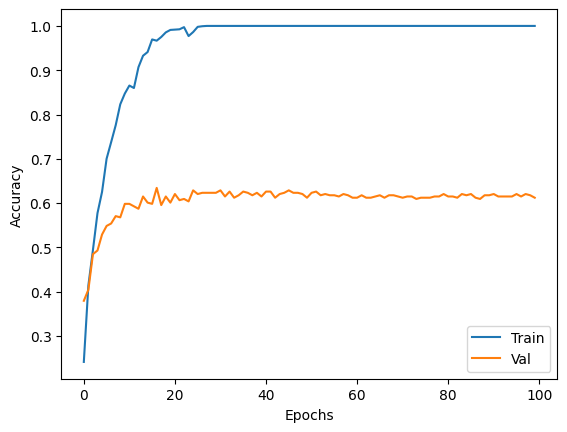

In [ ]:
history = nn_opt.history_
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred_opt = nn_opt.predict(x_test).astype(int)

In [ ]:
print('Accuracy %s' % accuracy_score(y_test, y_pred_opt))
print('F1-score %s' % f1_score(y_test, y_pred_opt, average=None))
print(classification_report(y_test, y_pred_opt))

#Accuracy 0.483974358974359
#F1-score [0.60251046 0.55384615 0.55319149 0.43636364 0.45360825 0.4 0.38202247 0.38636364]

Accuracy 0.483974358974359
F1-score [0.60251046 0.55384615 0.55319149 0.43636364 0.45360825 0.4
 0.38202247 0.38636364]
              precision    recall  f1-score   support

           0       0.50      0.75      0.60        96
           1       0.55      0.56      0.55        96
           2       0.57      0.54      0.55        48
           3       0.52      0.38      0.44        96
           4       0.45      0.46      0.45        96
           5       0.40      0.40      0.40        48
           6       0.41      0.35      0.38        96
           7       0.42      0.35      0.39        48

    accuracy                           0.48       624
   macro avg       0.48      0.47      0.47       624
weighted avg       0.48      0.48      0.48       624



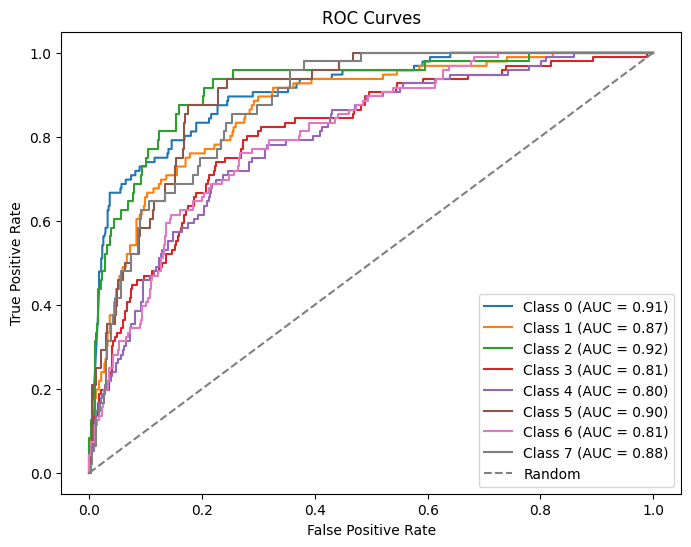

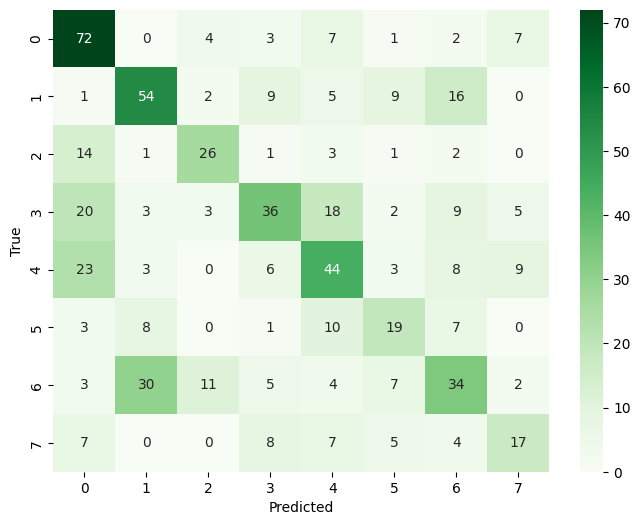

In [ ]:
# Assuming `y_test` is your true labels and `y_pred_opt` is your predicted labels
y_probs_opt = nn_opt.predict_proba(x_test)
y_test_binary = np.eye(n_classes)[y_test]

# ROC Curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binary[:, i], y_probs_opt[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Confusion Matrix
cm_opt = confusion_matrix(y_test, y_pred_opt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_opt, annot=True, cmap="Greens", fmt="d", xticklabels=range(n_classes), yticklabels=range(n_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
#plt.title('Confusion Matrix')
plt.show()

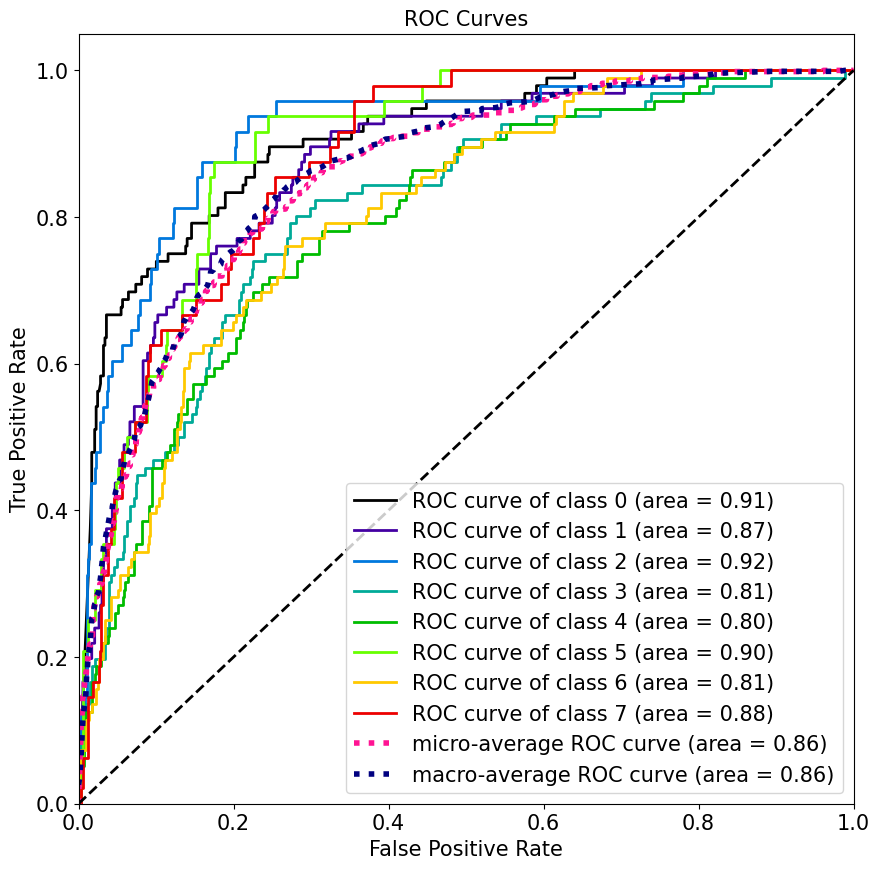

In [ ]:
y_probs_opt = nn_opt.predict_proba(x_test)
plot_roc(y_test, y_probs_opt, figsize=(10,10), title_fontsize=15, text_fontsize=15)
plt.show()

###Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
es = EarlyStopping(monitor='val_accuracy', patience=10, verbose=True) #questi valori, soprattutto della patience può essere cambiato

In [ ]:
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_accuracy', save_best_only=True)

nn_es = KerasClassifier(model=build_model_opt(0.001), callbacks=[es, mc])

In [ ]:
nn_es.fit(x_train1, y_train1, validation_data=(x_val, y_val), epochs=100)

Epoch 1/100
46/46 [==============================] - 1s 8ms/step - loss: 2.0021 - accuracy: 0.2082 - val_loss: 1.8268 - val_accuracy: 0.3269
Epoch 2/100
23/46 [==============>...............] - ETA: 0s - loss: 1.6794 - accuracy: 0.3927

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


46/46 [==============================] - 0s 4ms/step - loss: 1.6250 - accuracy: 0.3990 - val_loss: 1.5402 - val_accuracy: 0.4349
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 1.2875 - accuracy: 0.5274 - val_loss: 1.3560 - val_accuracy: 0.4737
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 1.0666 - accuracy: 0.5989 - val_loss: 1.2778 - val_accuracy: 0.5097
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.9100 - accuracy: 0.6711 - val_loss: 1.2377 - val_accuracy: 0.5291
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8426 - accuracy: 0.6856 - val_loss: 1.2864 - val_accuracy: 0.5208
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7295 - accuracy: 0.7349 - val_loss: 1.2372 - val_accuracy: 0.5374
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.8126 - val_loss: 1.2578 - val_accuracy: 0.5485
Epoch 9/100
46/46 [======

KerasClassifier(
	model=<keras.src.engine.sequential.Sequential object at 0x7d1d00960ca0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.EarlyStopping object at 0x7d1d00962e60>, <keras.src.callbacks.ModelCheckpoint object at 0x7d1d00daa290>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [ ]:
y_pred_es = nn_es.predict(x_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred_es))
print('F1-score %s' % f1_score(y_test, y_pred_es, average=None))
print(classification_report(y_test, y_pred_es))
#patience 10 epochs: Accuracy 0.46474358974358976
#patience 20 epoche: Accuracy 0.4519230769230769


20/20 [==============================] - 0s 1ms/step
Accuracy 0.46314102564102566
F1-score [0.59360731 0.5212766  0.39252336 0.44594595 0.43349754 0.38834951
 0.3575419  0.4950495 ]
              precision    recall  f1-score   support

           0       0.53      0.68      0.59        96
           1       0.53      0.51      0.52        96
           2       0.36      0.44      0.39        48
           3       0.63      0.34      0.45        96
           4       0.41      0.46      0.43        96
           5       0.36      0.42      0.39        48
           6       0.39      0.33      0.36        96
           7       0.47      0.52      0.50        48

    accuracy                           0.46       624
   macro avg       0.46      0.46      0.45       624
weighted avg       0.48      0.46      0.46       624



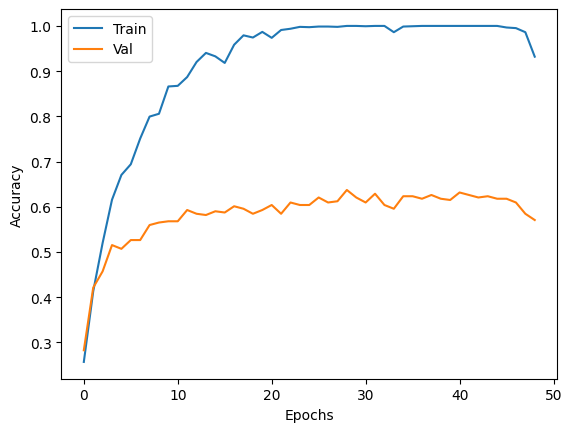

In [ ]:
#con patience 20 epoche
history = nn_es.history_
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.xlim(0,50)
plt.legend()
plt.show()

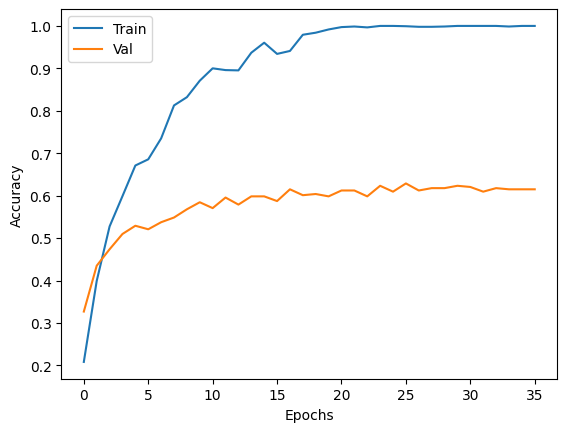

In [ ]:
#con patience 10 epoche
history = nn_es.history_
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.xlim(0,50)
plt.legend()
plt.show()

###L2 Regularization

In [ ]:
from keras.regularizers import l2, l1

In [ ]:
n_classes = 8 #se queste sono le classi per la variabile target, nel nostro caso è diverso, sarebbero il numero di emotions
def build_L2_model(optimizer__learning_rate):

    n_feature = x_train.shape[1]
    #h_dim = 64
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu', kernel_regularizer=l2(0.001))) #questo e quello successivo sono gli hidden layer
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(n_classes, activation='softmax')) #questo dovrebbe essere il layer di uscita

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model

In [ ]:
#Modello NN con early stopping + L2
mc = ModelCheckpoint('best_model_L2.h5', monitor='val_accuracy', save_best_only=True)

nn_L2 = KerasClassifier(model=build_L2_model(0.001), callbacks=[es,mc])

In [ ]:
nn_L2.fit(x_train1, y_train1, validation_data=(x_val, y_val), epochs=100)

Epoch 1/100
46/46 [==============================] - 1s 9ms/step - loss: 2.1378 - accuracy: 0.3074 - val_loss: 1.8940 - val_accuracy: 0.3767
Epoch 2/100
20/46 [============>.................] - ETA: 0s - loss: 1.7693 - accuracy: 0.4391

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


46/46 [==============================] - 0s 4ms/step - loss: 1.7341 - accuracy: 0.4670 - val_loss: 1.7422 - val_accuracy: 0.4349
Epoch 3/100
46/46 [==============================] - 0s 6ms/step - loss: 1.5114 - accuracy: 0.5482 - val_loss: 1.6246 - val_accuracy: 0.4654
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 1.3009 - accuracy: 0.6350 - val_loss: 1.5697 - val_accuracy: 0.4931
Epoch 5/100
46/46 [==============================] - 0s 4ms/step - loss: 1.1528 - accuracy: 0.6863 - val_loss: 1.5135 - val_accuracy: 0.5485
Epoch 6/100
46/46 [==============================] - 0s 4ms/step - loss: 1.0407 - accuracy: 0.7439 - val_loss: 1.5183 - val_accuracy: 0.5208
Epoch 7/100
46/46 [==============================] - 0s 5ms/step - loss: 0.9806 - accuracy: 0.7661 - val_loss: 1.4271 - val_accuracy: 0.5568
Epoch 8/100
46/46 [==============================] - 0s 6ms/step - loss: 0.8886 - accuracy: 0.7863 - val_loss: 1.4709 - val_accuracy: 0.5789
Epoch 9/100
46/46 [======

KerasClassifier(
	model=<keras.src.engine.sequential.Sequential object at 0x7d1cf83ef4f0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.EarlyStopping object at 0x7d1d00962e60>, <keras.src.callbacks.ModelCheckpoint object at 0x7d1cf83eeec0>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [ ]:
y_pred_L2 = nn_L2.predict(x_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred_L2))
print('F1-score %s' % f1_score(y_test, y_pred_L2, average=None))
print(classification_report(y_test, y_pred_L2))

20/20 [==============================] - 0s 2ms/step
Accuracy 0.5
F1-score [0.6359447  0.54634146 0.54368932 0.43589744 0.49473684 0.48076923
 0.31325301 0.5046729 ]
              precision    recall  f1-score   support

           0       0.57      0.72      0.64        96
           1       0.51      0.58      0.55        96
           2       0.51      0.58      0.54        48
           3       0.57      0.35      0.44        96
           4       0.50      0.49      0.49        96
           5       0.45      0.52      0.48        48
           6       0.37      0.27      0.31        96
           7       0.46      0.56      0.50        48

    accuracy                           0.50       624
   macro avg       0.49      0.51      0.49       624
weighted avg       0.50      0.50      0.49       624



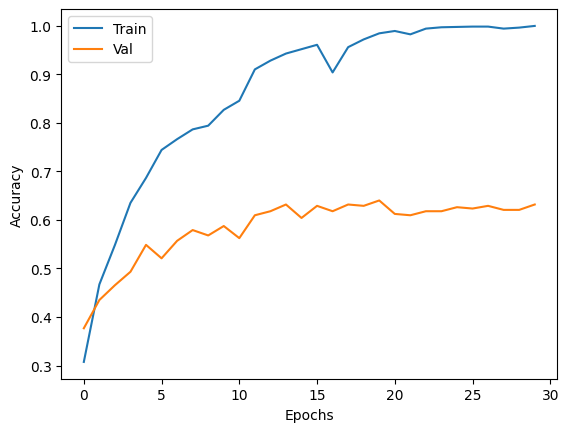

In [ ]:

history = nn_L2.history_
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.xlim(0,50)
plt.legend()
plt.show()

20/20 [==============================] - 0s 2ms/step


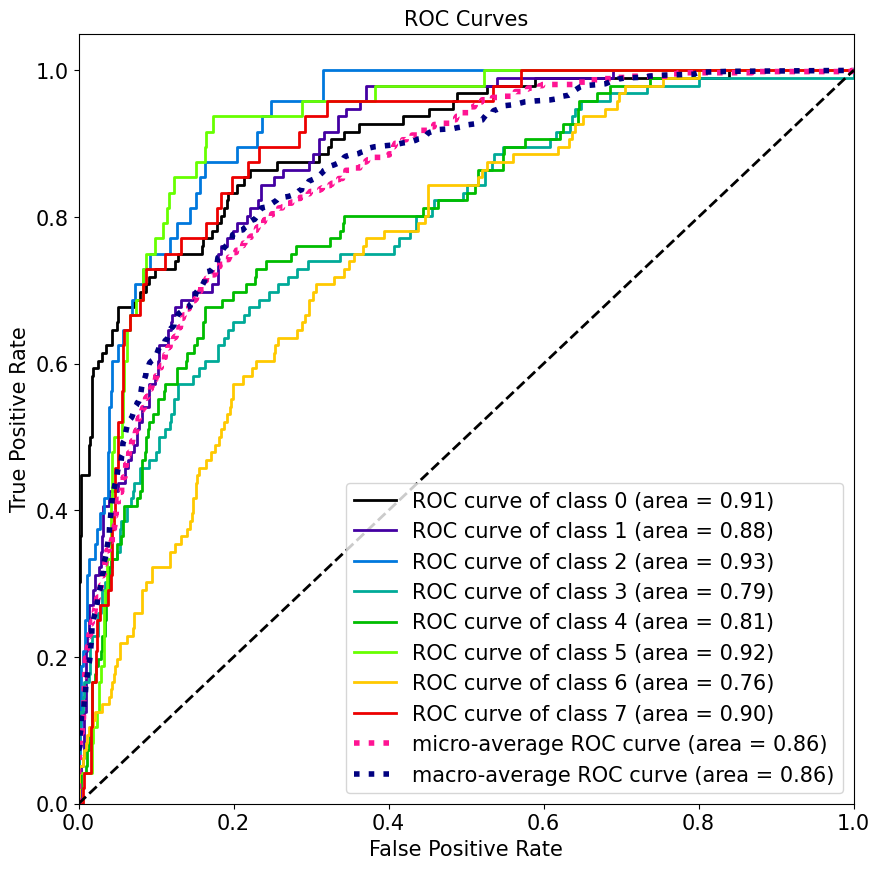

In [ ]:
y_probs_L2 = nn_L2.predict_proba(x_test)
plot_roc(y_test, y_probs_L2, figsize=(10,10), title_fontsize=15, text_fontsize=15)
plt.show()

In [ ]:
#Provo a fare L2 regularization senza Early stopping:
nn_l2 = KerasClassifier(model=build_L2_model(0.001))

In [ ]:
nn_l2.fit(x_train1, y_train1, validation_data=(x_val, y_val), epochs=100)

Epoch 1/100
46/46 [==============================] - 2s 10ms/step - loss: 2.2175 - accuracy: 0.2651 - val_loss: 2.0026 - val_accuracy: 0.4100
Epoch 2/100
46/46 [==============================] - 0s 5ms/step - loss: 1.8182 - accuracy: 0.4386 - val_loss: 1.6872 - val_accuracy: 0.4571
Epoch 3/100
46/46 [==============================] - 0s 4ms/step - loss: 1.4996 - accuracy: 0.5579 - val_loss: 1.5828 - val_accuracy: 0.4903
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 1.2967 - accuracy: 0.6266 - val_loss: 1.5309 - val_accuracy: 0.5014
Epoch 5/100
46/46 [==============================] - 0s 5ms/step - loss: 1.1525 - accuracy: 0.6933 - val_loss: 1.5059 - val_accuracy: 0.4986
Epoch 6/100
46/46 [==============================] - 0s 6ms/step - loss: 1.0413 - accuracy: 0.7321 - val_loss: 1.4999 - val_accuracy: 0.5429
Epoch 7/100
46/46 [==============================] - 0s 7ms/step - loss: 0.9506 - accuracy: 0.7647 - val_loss: 1.4474 - val_accuracy: 0.5734
Epoch 8/100


KerasClassifier(
	model=<keras.src.engine.sequential.Sequential object at 0x7d1cf8636110>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [ ]:
y_pred_l2 = nn_l2.predict(x_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred_l2))
print('F1-score %s' % f1_score(y_test, y_pred_l2, average=None))
print(classification_report(y_test, y_pred_l2))

20/20 [==============================] - 0s 1ms/step
Accuracy 0.47115384615384615
F1-score [0.65198238 0.56585366 0.53061224 0.37410072 0.46226415 0.33009709
 0.25316456 0.45283019]
              precision    recall  f1-score   support

           0       0.56      0.77      0.65        96
           1       0.53      0.60      0.57        96
           2       0.52      0.54      0.53        48
           3       0.60      0.27      0.37        96
           4       0.42      0.51      0.46        96
           5       0.31      0.35      0.33        48
           6       0.32      0.21      0.25        96
           7       0.41      0.50      0.45        48

    accuracy                           0.47       624
   macro avg       0.46      0.47      0.45       624
weighted avg       0.47      0.47      0.46       624



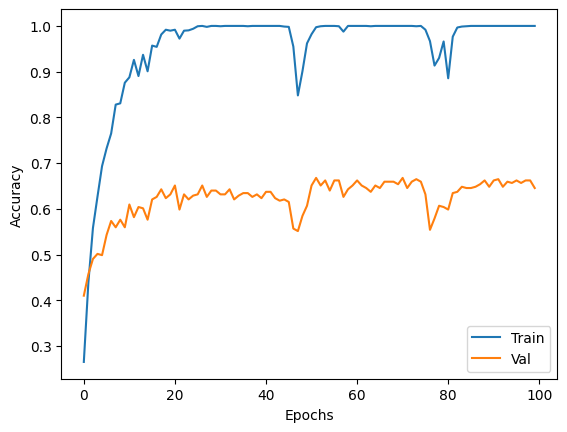

In [ ]:
history = nn_l2.history_
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.xlim(0,50)
plt.legend()
plt.show()

In [ ]:
#Provo con altri valori del kernel (sopra è 0.001, qui sarà 0.005)
n_classes = 8 #se queste sono le classi per la variabile target, nel nostro caso è diverso, sarebbero il numero di emotions
def build_L2_model(optimizer__learning_rate):

    n_feature = x_train.shape[1]
    #h_dim = 64
    model = Sequential()
    model.add(Dense(128, input_dim=n_feature, activation='relu', kernel_regularizer=l2(0.005))) #questo e quello successivo sono gli hidden layer
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.005)))
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.005)))
    model.add(Dense(n_classes, activation='softmax')) #questo dovrebbe essere il layer di uscita

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model

In [ ]:
#Modello NN con early stopping + L2
mc = ModelCheckpoint('best_model_L2.h5', monitor='val_accuracy', save_best_only=True)

nn_L2 = KerasClassifier(model=build_L2_model(0.001), callbacks=[es,mc])

In [ ]:
nn_L2.fit(x_train1, y_train1, validation_data=(x_val, y_val), epochs=100)

Epoch 1/100
46/46 [==============================] - 1s 9ms/step - loss: 3.2144 - accuracy: 0.2422 - val_loss: 2.9117 - val_accuracy: 0.3158
Epoch 2/100
24/46 [==============>...............] - ETA: 0s - loss: 2.7672 - accuracy: 0.4076

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


46/46 [==============================] - 0s 4ms/step - loss: 2.6858 - accuracy: 0.4358 - val_loss: 2.6063 - val_accuracy: 0.4127
Epoch 3/100
46/46 [==============================] - 0s 5ms/step - loss: 2.3627 - accuracy: 0.5163 - val_loss: 2.3680 - val_accuracy: 0.4654
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 2.1254 - accuracy: 0.6037 - val_loss: 2.1910 - val_accuracy: 0.4931
Epoch 5/100
46/46 [==============================] - 0s 4ms/step - loss: 1.9228 - accuracy: 0.6468 - val_loss: 2.1331 - val_accuracy: 0.5402
Epoch 6/100
46/46 [==============================] - 0s 4ms/step - loss: 1.8016 - accuracy: 0.6773 - val_loss: 2.0322 - val_accuracy: 0.5512
Epoch 7/100
46/46 [==============================] - 0s 4ms/step - loss: 1.6419 - accuracy: 0.7349 - val_loss: 2.0002 - val_accuracy: 0.5596
Epoch 8/100
46/46 [==============================] - 0s 4ms/step - loss: 1.5595 - accuracy: 0.7578 - val_loss: 1.9763 - val_accuracy: 0.5817
Epoch 9/100
46/46 [======

KerasClassifier(
	model=<keras.src.engine.sequential.Sequential object at 0x781627701cf0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.EarlyStopping object at 0x781627700790>, <keras.src.callbacks.ModelCheckpoint object at 0x7816277007f0>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [ ]:
y_pred_L2 = nn_L2.predict(x_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred_L2))
print('F1-score %s' % f1_score(y_test, y_pred_L2, average=None))
print(classification_report(y_test, y_pred_L2)) #otteniamo accuracy di 0.51

20/20 [==============================] - 0s 3ms/step
Accuracy 0.5064102564102564
F1-score [0.64935065 0.59821429 0.41818182 0.57142857 0.40462428 0.45454545
 0.30656934 0.47058824]
              precision    recall  f1-score   support

           0       0.56      0.78      0.65        96
           1       0.52      0.70      0.60        96
           2       0.37      0.48      0.42        48
           3       0.71      0.48      0.57        96
           4       0.45      0.36      0.40        96
           5       0.40      0.52      0.45        48
           6       0.51      0.22      0.31        96
           7       0.44      0.50      0.47        48

    accuracy                           0.51       624
   macro avg       0.50      0.51      0.48       624
weighted avg       0.52      0.51      0.49       624



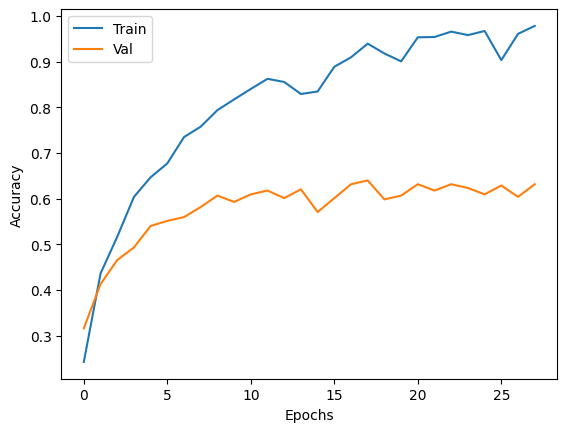

In [ ]:
#Con kernel regulizer di 0.005
history = nn_L2.history_
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.xlim(0,50)
plt.legend()
plt.show()

20/20 [==============================] - 0s 1ms/step


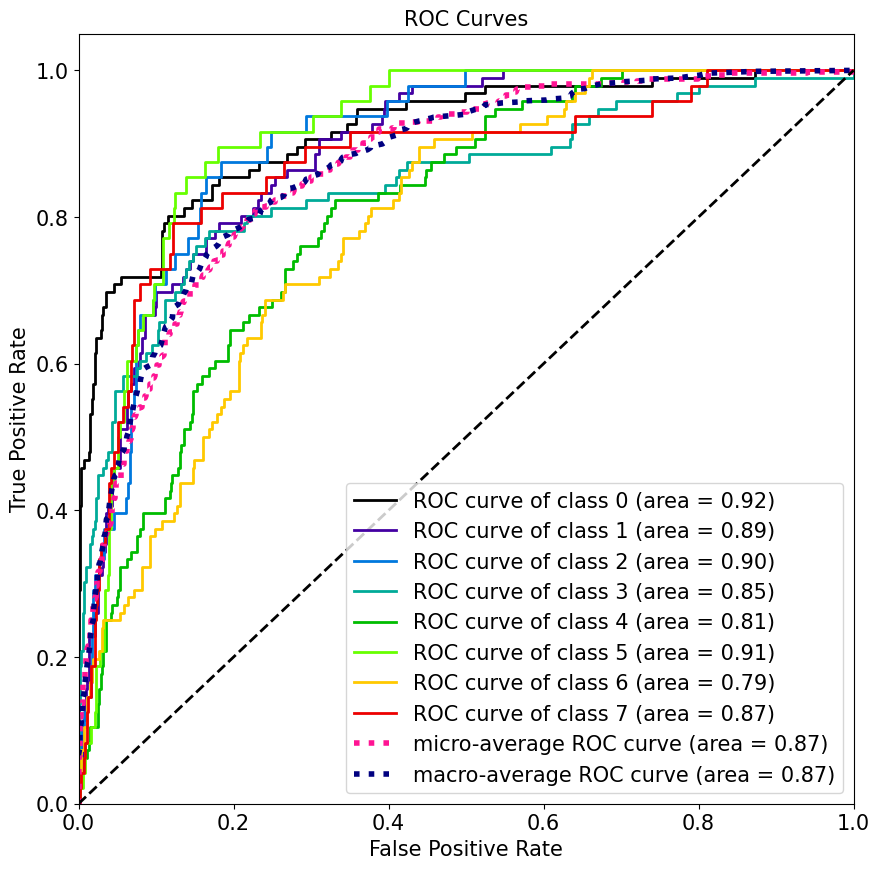

In [ ]:
y_probs_L2 = nn_L2.predict_proba(x_test)
plot_roc(y_test, y_probs_L2, figsize=(10,10), title_fontsize=15, text_fontsize=15)
plt.show()

###Dropout

In [ ]:
from keras.layers import Dropout


In [ ]:
n_classes = 8 #se queste sono le classi per la variabile target, nel nostro caso è diverso, sarebbero il numero di emotions
def build_DROPOUT_model(optimizer__learning_rate):

    n_feature = x_train.shape[1]
    h_dim = 64
    model = Sequential()
    model.add(Dense(h_dim, input_dim=n_feature, activation='relu')) #questo e quello successivo sono gli hidden layer
    model.add(Dropout(0.3))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(n_classes, activation='softmax')) #questo dovrebbe essere il layer di uscita

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model

In [ ]:
mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_accuracy', save_best_only=True)

nn_do = KerasClassifier(build_DROPOUT_model(0.001), callbacks=[es,mc])

In [ ]:
nn_do.fit(x_train1, y_train1, validation_data=(x_val, y_val), epochs=100)

Epoch 1/100
46/46 [==============================] - 2s 11ms/step - loss: 2.2084 - accuracy: 0.1742 - val_loss: 2.0071 - val_accuracy: 0.2299
Epoch 2/100
46/46 [==============================] - ETA: 0s - loss: 1.9996 - accuracy: 0.2047

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


46/46 [==============================] - 0s 4ms/step - loss: 1.9996 - accuracy: 0.2047 - val_loss: 1.9190 - val_accuracy: 0.3047
Epoch 3/100
46/46 [==============================] - 0s 5ms/step - loss: 1.9489 - accuracy: 0.2422 - val_loss: 1.8176 - val_accuracy: 0.3352
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 1.8603 - accuracy: 0.2623 - val_loss: 1.7372 - val_accuracy: 0.3961
Epoch 5/100
46/46 [==============================] - 0s 6ms/step - loss: 1.7808 - accuracy: 0.3158 - val_loss: 1.6250 - val_accuracy: 0.3989
Epoch 6/100
46/46 [==============================] - 0s 4ms/step - loss: 1.7211 - accuracy: 0.3380 - val_loss: 1.5584 - val_accuracy: 0.4183
Epoch 7/100
46/46 [==============================] - 0s 4ms/step - loss: 1.6695 - accuracy: 0.3498 - val_loss: 1.5015 - val_accuracy: 0.4377
Epoch 8/100
46/46 [==============================] - 0s 4ms/step - loss: 1.5943 - accuracy: 0.3949 - val_loss: 1.4535 - val_accuracy: 0.4654
Epoch 9/100
46/46 [======

KerasClassifier(
	model=<keras.src.engine.sequential.Sequential object at 0x7d1d007d33a0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.EarlyStopping object at 0x7d1d00962e60>, <keras.src.callbacks.ModelCheckpoint object at 0x7d1d007d3ca0>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [ ]:
y_pred_do = nn_do.predict(x_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred_do))
print('F1-score %s' % f1_score(y_test, y_pred_do, average=None))
print(classification_report(y_test, y_pred_do))

20/20 [==============================] - 0s 1ms/step
Accuracy 0.46153846153846156
F1-score [0.63865546 0.55454545 0.54237288 0.46808511 0.36809816 0.20930233
 0.27058824 0.42857143]
              precision    recall  f1-score   support

           0       0.54      0.79      0.64        96
           1       0.49      0.64      0.55        96
           2       0.46      0.67      0.54        48
           3       0.73      0.34      0.47        96
           4       0.45      0.31      0.37        96
           5       0.24      0.19      0.21        48
           6       0.31      0.24      0.27        96
           7       0.38      0.50      0.43        48

    accuracy                           0.46       624
   macro avg       0.45      0.46      0.44       624
weighted avg       0.47      0.46      0.44       624



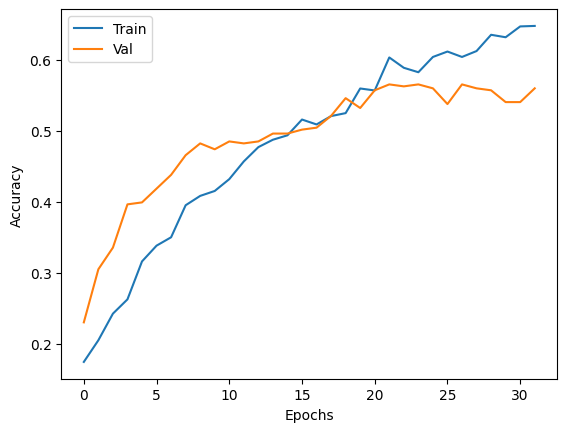

In [ ]:
history = nn_do.history_
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.xlim(0,50)
plt.legend()
plt.show()

In [ ]:
#Modello Dropout andando a prendere quello con il numero di neuroni negli strati che ha fatto il prof, quindi con 3 strati da 64 nodi

mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_accuracy', save_best_only=True)

nn_do1 = KerasClassifier(build_DROPOUT_model(0.001), callbacks=[es,mc])

In [ ]:
nn_do1.fit(x_train1, y_train1, validation_data=(x_val, y_val), epochs=100)

Epoch 1/100
46/46 [==============================] - 1s 9ms/step - loss: 2.1602 - accuracy: 0.1652 - val_loss: 1.9002 - val_accuracy: 0.2521
Epoch 2/100
37/46 [=======================>......] - ETA: 0s - loss: 1.9670 - accuracy: 0.2289

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


46/46 [==============================] - 0s 5ms/step - loss: 1.9703 - accuracy: 0.2311 - val_loss: 1.7485 - val_accuracy: 0.3186
Epoch 3/100
46/46 [==============================] - 0s 5ms/step - loss: 1.8388 - accuracy: 0.2804 - val_loss: 1.6436 - val_accuracy: 0.3657
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 1.7642 - accuracy: 0.3192 - val_loss: 1.5665 - val_accuracy: 0.3740
Epoch 5/100
46/46 [==============================] - 0s 6ms/step - loss: 1.6806 - accuracy: 0.3289 - val_loss: 1.5116 - val_accuracy: 0.3823
Epoch 6/100
46/46 [==============================] - 0s 6ms/step - loss: 1.6083 - accuracy: 0.3789 - val_loss: 1.4524 - val_accuracy: 0.4294
Epoch 7/100
46/46 [==============================] - 0s 5ms/step - loss: 1.5687 - accuracy: 0.3949 - val_loss: 1.4014 - val_accuracy: 0.4765
Epoch 8/100
46/46 [==============================] - 0s 5ms/step - loss: 1.4918 - accuracy: 0.4067 - val_loss: 1.3649 - val_accuracy: 0.4737
Epoch 9/100
46/46 [======

KerasClassifier(
	model=<keras.src.engine.sequential.Sequential object at 0x7d1cf0525e40>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.EarlyStopping object at 0x7d1d00962e60>, <keras.src.callbacks.ModelCheckpoint object at 0x7d1cf06ea6e0>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [ ]:
y_pred_do1 = nn_do1.predict(x_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred_do1))
print('F1-score %s' % f1_score(y_test, y_pred_do1, average=None))
print(classification_report(y_test, y_pred_do1))

20/20 [==============================] - 0s 1ms/step
Accuracy 0.4855769230769231
F1-score [0.61538462 0.63768116 0.46153846 0.44295302 0.33879781 0.4742268
 0.32258065 0.47169811]
              precision    recall  f1-score   support

           0       0.50      0.79      0.62        96
           1       0.59      0.69      0.64        96
           2       0.43      0.50      0.46        48
           3       0.62      0.34      0.44        96
           4       0.36      0.32      0.34        96
           5       0.47      0.48      0.47        48
           6       0.42      0.26      0.32        96
           7       0.43      0.52      0.47        48

    accuracy                           0.49       624
   macro avg       0.48      0.49      0.47       624
weighted avg       0.49      0.49      0.47       624



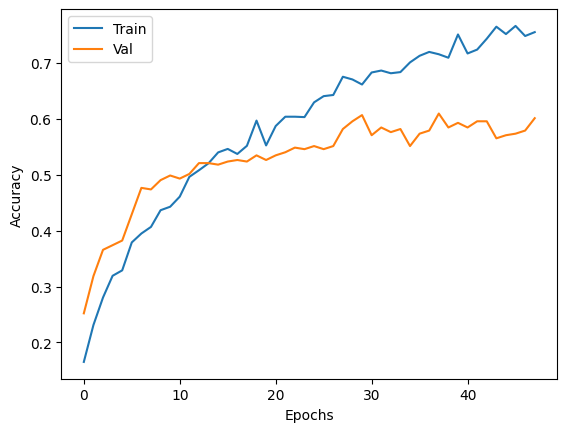

In [ ]:
history = nn_do1.history_
plt.plot(history['accuracy'], label='Train')
plt.plot(history['val_accuracy'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.xlim(0,50)
plt.legend()
plt.show()

In [ ]:
#provo con un dropout di 0.2 invece che di 0.3
n_classes = 8 #se queste sono le classi per la variabile target, nel nostro caso è diverso, sarebbero il numero di emotions
def build_DROPOUT_model(optimizer__learning_rate):

    n_feature = x_train.shape[1]
    h_dim = 64
    model = Sequential()
    model.add(Dense(h_dim, input_dim=n_feature, activation='relu')) #questo e quello successivo sono gli hidden layer
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(h_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation='softmax')) #questo dovrebbe essere il layer di uscita

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer="adam", metrics=['accuracy'])
    return model

In [ ]:
mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_accuracy', save_best_only=True)

nn_do1 = KerasClassifier(build_DROPOUT_model(0.001), callbacks=[es,mc])

In [ ]:
nn_do1.fit(x_train1, y_train1, validation_data=(x_val, y_val), epochs=100)

Epoch 1/100
46/46 [==============================] - 3s 26ms/step - loss: 2.0772 - accuracy: 0.1860 - val_loss: 1.8330 - val_accuracy: 0.2798
Epoch 2/100
10/46 [=====>........................] - ETA: 0s - loss: 1.8462 - accuracy: 0.3156

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


46/46 [==============================] - 0s 10ms/step - loss: 1.8296 - accuracy: 0.3033 - val_loss: 1.6451 - val_accuracy: 0.3573
Epoch 3/100
46/46 [==============================] - 0s 10ms/step - loss: 1.6600 - accuracy: 0.3546 - val_loss: 1.5251 - val_accuracy: 0.4100
Epoch 4/100
46/46 [==============================] - 0s 6ms/step - loss: 1.5561 - accuracy: 0.4053 - val_loss: 1.4707 - val_accuracy: 0.4238
Epoch 5/100
46/46 [==============================] - 0s 8ms/step - loss: 1.4667 - accuracy: 0.4178 - val_loss: 1.3965 - val_accuracy: 0.4515
Epoch 6/100
46/46 [==============================] - 0s 8ms/step - loss: 1.3719 - accuracy: 0.4712 - val_loss: 1.3411 - val_accuracy: 0.4848
Epoch 7/100
46/46 [==============================] - 0s 9ms/step - loss: 1.2899 - accuracy: 0.5101 - val_loss: 1.3129 - val_accuracy: 0.5014
Epoch 8/100
46/46 [==============================] - 0s 5ms/step - loss: 1.2417 - accuracy: 0.5281 - val_loss: 1.3037 - val_accuracy: 0.4903
Epoch 9/100
46/46 [====

KerasClassifier(
	model=<keras.src.engine.sequential.Sequential object at 0x781624d7c610>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.src.callbacks.EarlyStopping object at 0x781627700790>, <keras.src.callbacks.ModelCheckpoint object at 0x781624d7ddb0>]
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [ ]:
y_pred_do1 = nn_do1.predict(x_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred_do1))
print('F1-score %s' % f1_score(y_test, y_pred_do1, average=None))
print(classification_report(y_test, y_pred_do1))
#dall'accuracy si vede che è peggio del precedente, quindi manteniamo gli strati di Dropout a 0.3 - caso riportato precedente

20/20 [==============================] - 0s 7ms/step
Accuracy 0.47596153846153844
F1-score [0.64705882 0.58064516 0.52525253 0.37762238 0.38743455 0.37037037
 0.30573248 0.48421053]
              precision    recall  f1-score   support

           0       0.54      0.80      0.65        96
           1       0.52      0.66      0.58        96
           2       0.51      0.54      0.53        48
           3       0.57      0.28      0.38        96
           4       0.39      0.39      0.39        96
           5       0.33      0.42      0.37        48
           6       0.39      0.25      0.31        96
           7       0.49      0.48      0.48        48

    accuracy                           0.48       624
   macro avg       0.47      0.48      0.46       624
weighted avg       0.47      0.48      0.46       624

